# CZ4032 Assignment 2 - Technical Review on Clustering Algorithms

Clustering is a fundamental data analysis component when it comes to unsupervised learning in data science. There are several clustering algorithms in literature, with each being useful in their own way. In this report, we explore several of these clustering algorithms, elaborate on their strengths and weaknesses, and study how changing their hyperparameters can affect their performance. We use several datasets from various domains to evaluate the usefulness and performance of the algorithms.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sklearn.cluster as cluster
import time
from sklearn import metrics
from sklearn.metrics import pairwise_distances
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':1}

# Synthetic Dataset

This is a generated dataset found online that has non-spherical shaped clusters, as well as some noise all over. But as the data only has 2 dimensions, it can be visualized easily. The data ideally has 6 clusters which are easily visually identifiable, although they do not provide much separation between clusters. This is expected to be a challenging dataset for clustering algorithms due to the non-globular shape of clusters and the presence of noise. The visualization of the dataset can be seen below.

In [ ]:
synth_data = np.load('drive/MyDrive/CZ4032/CZ4032 Assignment 2/Data/clusterable_data.npy')

In [ ]:
synth_data.shape

(2309, 2)

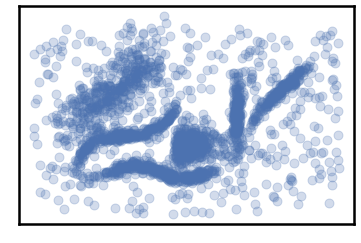

In [ ]:
plt.scatter(synth_data.T[0], synth_data.T[1], c='b', **plot_kwds)
plt.rcParams["figure.figsize"] = (7,7)

frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

## Testing Clustering Algorithms

In [ ]:
def plot_clusters(data, algorithm, args, kwds, groundTruths = None):
    # Measure time
    start_time = time.time()
    # Get clusters
    kmeans = algorithm(*args, **kwds).fit(data)
    labels = kmeans.predict(data)
    # Measure time
    end_time = time.time()
    
    # Plot the clusters using a scatter plot
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.6, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

    print(f"No. of Iterations Run for Best Result: {kmeans.n_iter_}")
    print(f"Inertia of Best Result: {kmeans.inertia_}")
    if not groundTruths:
        print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels, metric='euclidean')}")
    else:
        print(f"Fowlkes-Mallows Index: {metrics.fowlkes_mallows_score(groundTruths, labels)}")

As this is a rather small dataset with only two dimensions, poor performance on this dataset would imply even poorer performance on real-world datasets.

# K-Means

The benefits of K-Means are as such:
* K-Means clustering scales well as the dataset size increases 
Due to its simplicity, it can be used across a wide variety of application domains and fields.
* It is fast and has been optimized by many libraries and a lot of implementations are available
* K-Means always converges, although it might be to a local and not global minimum.

The drawbacks of K-Means are as such:
* K-Means requires the number of clusters to be specified. This might be hard to determine if the dataset’s domain knowledge is not available.
    * To tackle this issue, there are methods such as the elbow method to find the optimal number of clusters for a dataset of unknown number of clusters. This is done by running K-Means for many different numbers of clusters and scoring each run with a performance metric and attempting to find an elbow point. This method will be explored and elaborated on in the experiments section.
* Using inertia as the metric to optimize for can be problematic as inertia assumes that clusters are globular. This causes the algorithm to be poor at creating elongated clusters, or clusters with irregular shapes, and responds mostly well to clusters that are spherical or circular in shape.
* K-Means is sensitive to centroid initialization. Different initialization of the centroids might result in different clusters being found.
To tackle this issue, it is often the case that K-Means is run multiple times with different random seeds of the centroids to find the most optimal set of clusters in terms of inertia. 
* A variant of K-Means, called K-Means++ is also available, which alters the initialization scheme from just being random to something that is only partially random. More details about K-Means++ will be elaborated on below.


## K-Means vs K-Means++

K-Means++ is a variant of the K-Means algorithm that differs in how the centroids are initialized. Instead of just random initialization of centroids, K-Means++ does it in an informed manner.  Random initialization of centroids might result in centroids being close to one another and this will mean it takes more iterations to shift the centroids to the correct position, or that some clusters are not found. K-Means++ initializes the centroids to be as distant from one another as possible. 

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 50.05244442686692
start iteration
done sorting
end inner loop
Iteration 1, inertia 47.03801705082764
start iteration
done sorting
end inner loop
Iteration 2, inertia 46.32995253452747
start iteration
done sorting
end inner loop
Iteration 3, inertia 46.049988158407324
start iteration
done sorting
end inner loop
Iteration 4, inertia 45.85446591352888
start iteration
done sorting
end inner loop
Iteration 5, inertia 45.66703737800866
start iteration
done sorting
end inner loop
Iteration 6, inertia 45.53130056881975
start iteration
done sorting
end inner loop
Iteration 7, inertia 45.42988113499506
start iteration
done sorting
end inner loop
Iteration 8, inertia 45.381230552805754
start iteration
done sorting
end inner loop
Iteration 9, inertia 45.32836062916127
start iteration
done sorting
end inner loop
Iteration 10, inertia 45.232888884652155
start iteration
done sorting
end inner loop
Iteration 11, i

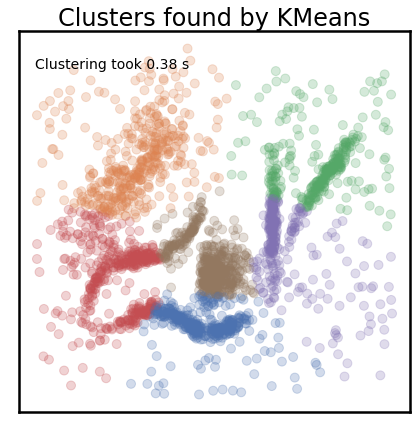

In [ ]:
plot_clusters(synth_data, cluster.KMeans, (), {'n_clusters':6, 'init':'k-means++', 'verbose': 1})

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 64.08331818063178
start iteration
done sorting
end inner loop
Iteration 1, inertia 55.11249801811628
start iteration
done sorting
end inner loop
Iteration 2, inertia 52.61513826918075
start iteration
done sorting
end inner loop
Iteration 3, inertia 50.503844259588426
start iteration
done sorting
end inner loop
Iteration 4, inertia 48.606587009820316
start iteration
done sorting
end inner loop
Iteration 5, inertia 47.535759082778
start iteration
done sorting
end inner loop
Iteration 6, inertia 47.023107312322495
start iteration
done sorting
end inner loop
Iteration 7, inertia 46.34055231366988
start iteration
done sorting
end inner loop
Iteration 8, inertia 45.66068558286233
start iteration
done sorting
end inner loop
Iteration 9, inertia 45.2112516724414
start iteration
done sorting
end inner loop
Iteration 10, inertia 44.987496401008386
start iteration
done sorting
end inner loop
Iteration 11, ine

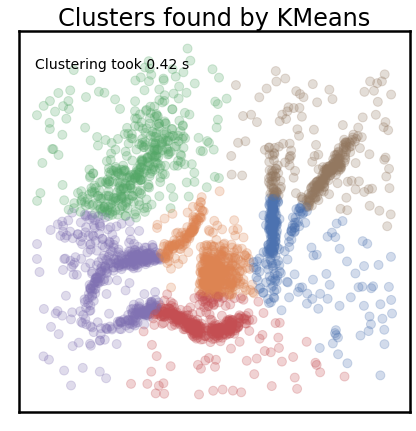

In [ ]:
plot_clusters(synth_data, cluster.KMeans, (), {'n_clusters':6, 'init':'random', 'verbose': 1})

K-Means was run for 10 times each with the two initialization methods. The ‘Max Inertia Seen At Iteration 1’ is the maximum inertia value that was observed across the 10 runs of the algorithm, using different centroid seeds. ‘Min Inertia Seen at Last Iteration’ is the minimum inertia seen across the 10 runs of the algorithm, using different centroid seeds. The ‘No. of Iterations to Converge For Best Run’ is the number of iterations taken for the run with the minimum inertia to converge. The ‘Running Time (s)’ is the amount of time taken in seconds to run the algorithm 10 times.

The results evidently show that K-Means++ initialization is superior to the random initialization of the original K-Means algorithm. The inertia at the first iteration is significantly lower for K-Means++ and this in turn leads to there requiring less iterations for convergence to occur. The end result of clustering is the same as expected, since the assignment algorithm itself is identical. Due to random initialization K-Means needing more iterations to converge, the running time is also longer for it compared to K-Means++. Silhouette Coefficient is identical as expected across the two initialization variants since the assignment algorithm itself is identical.


## Finding Optimal Number of Clusters

One inherent disadvantage of K-Means is the need to know the number of clusters beforehand. This means that K-Means requires an extra step to find the number of clusters while other algorithms such as DBSCAN do not.

In finding the number of clusters, the elbow method is a popular method. Simply put, we measure the performance metric while changing the number of clusters and choose the best one. The best number of clusters is supposed to be the elbow-looking point. For this experiment, we tested out the elbow method on the Iris and synthetic datasets


## Synthetic Dataset

In [ ]:
score = []
S = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(synth_data)
    labels = kmeans.predict(synth_data)
    score.append(kmeans.inertia_)
    S.append(metrics.silhouette_score(synth_data, labels, metric='euclidean'))

score

[150.3138676378802,
 85.10309033463292,
 61.4247473720349,
 51.381242593726235,
 43.1337068409078,
 36.567885316104764,
 31.3376836387178,
 27.584586347555987,
 24.60986709039244]

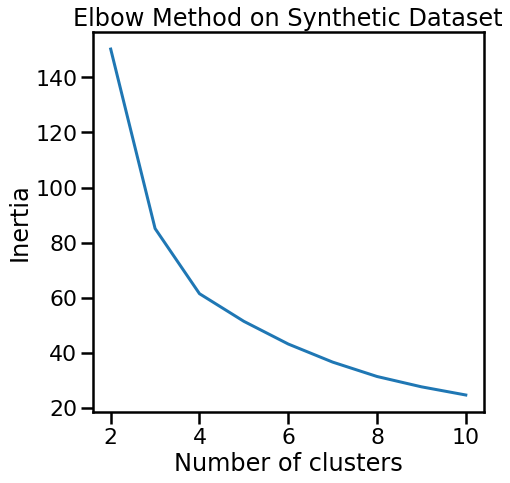

In [ ]:
plt.plot(range(2, 11), score)
plt.title('Elbow Method on Synthetic Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

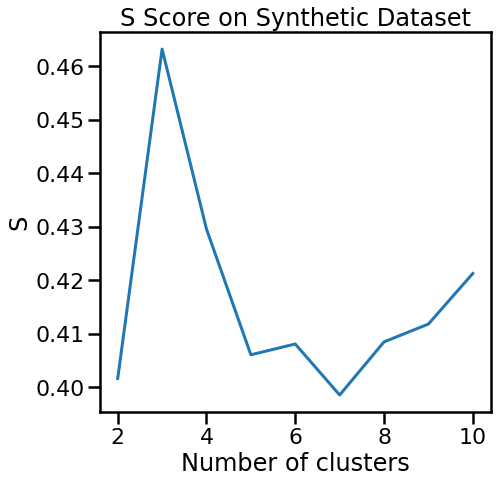

In [ ]:
plt.plot(range(2, 11), S)
plt.title('S Score on Synthetic Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('S') 
plt.show()

## Iris Dataset

In [ ]:
score = []
S = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(iris_data)
    labels = kmeans.predict(iris_data)
    score.append(kmeans.inertia_)
    S.append(metrics.silhouette_score(iris_data, labels, metric='euclidean'))
score

[133.46431822602608,
 69.42973924466338,
 49.43781558441559,
 40.325266666666664,
 33.00220043290044,
 29.221158008658012,
 25.381807359307366,
 23.197399407609936,
 21.452838102972542]

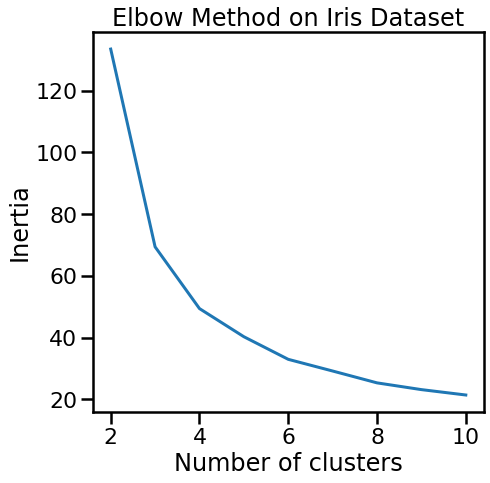

In [ ]:
plt.plot(range(2, 11), score)
plt.title('Elbow Method on Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

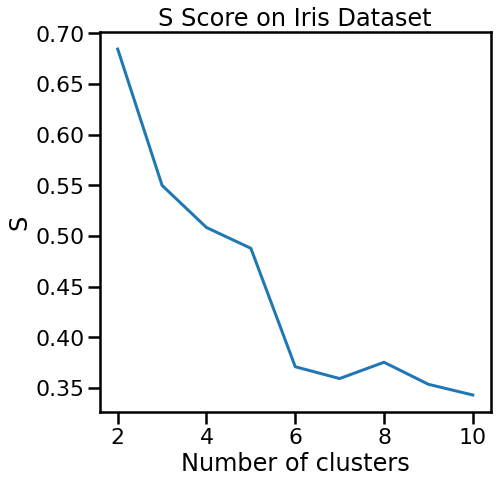

In [ ]:
plt.plot(range(2, 11), S)
plt.title('S Score on Iris Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('S') 
plt.show()

The plots suggest that for both datasets, the optimal number of clusters is either 3 or 4. This is accurate for Iris, with 3 clusters corresponding to 3 classes. But for the synthetic dataset, this is not accurate, as there are supposed to be 6 clusters. This shows that even though the elbow method is a popular heuristic in determining the number of clusters, it is still prone to error, and should not be used as an absolute indication of the number of clusters that are present in a dataset.


## K-Means on Synthetic

No. of Iterations Run for Best Result: 7
Inertia of Best Result: 85.10324366780947
Silhouette Coefficient: 0.46319107032549806


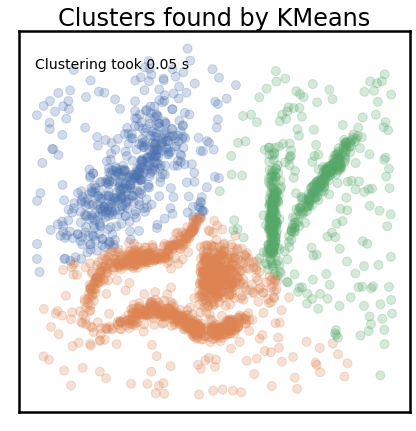

In [ ]:
plot_clusters(data, cluster.KMeans, (), {'n_clusters':3, 'init':'k-means++', 'verbose': 0})

No. of Iterations Run for Best Result: 17
Inertia of Best Result: 43.1337068409078
Silhouette Coefficient: 0.4080656577651516


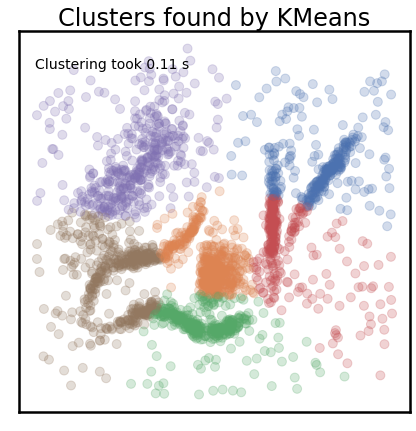

In [ ]:
plot_clusters(synth_data, cluster.KMeans, (), {'n_clusters':6, 'init':'k-means++', 'verbose': 0})

**Evaluation of Algorithm**
* **Performance**: Due to the simplicity of K-Means, it is very efficient, even for  a large dataset.
* **Correctness**: K-Means assigns all points into clusters, regardless of whether the point is noise or not. Due to the assumption of globular clusters, non-globular clusters such as elongated clusters will not be formed, even if they exist. Therefore, K-Means does not do well in terms of correctness.
* **Ease of Parameter Tuning**: The main parameter to tune is the number of clusters. Whether this is prior knowledge or not is dependent on the dataset and domain. The elbow method does help, but might not be too useful for large, real-world datasets.
* **Deterministic**: Random initialization might mean different clusters forming, dependent on data. 




# Mean Shift
Mean shift clustering is a centroid-based clustering algorithm. Unlike K-Means, mean shift clustering does not require the user to provide the number of clusters that the dataset has, so there is no need to apply the elbow method or arbitrarily guess the number of clusters before applying the algorithm. Instead, it automatically determines the number of clusters based on the bandwidth and the number of data points in the dataset. The intuition behind the mean shift algorithm is that the features of the data points in a dataset adhere to some form of probability density function and so the centroids of the clusters for this algorithm are essentially the maxima/mode points of the density function.

It iteratively updates the centroids to be the mean of points within a given neighborhood. This neighborhood region is defined by bandwidth, which is the only parameter that the user has to define beforehand. There are also ways to estimate the bandwidth automatically. 

The benefits of mean shift clustering are as such:
* It is able to handle clusters of arbitrary shape and number and no assumptions are made by the algorithm about the number of clusters present or the shape of the clusters.
* It just needs the bandwidth parameter to be set by the user
* There is no issue of getting stuck in local minimas like in K-means
* Outliers and noise do not cause any issues to the algorithm
* The end result is not dependent on the initialization 
* It is guaranteed to converge

The drawbacks of mean shift clustering are as such:
* Output is highly dependent on bandwidth provided. 
* Choosing an appropriate bandwidth is a non-trivial task and the choice of bandwidth might result in data points being missed out or independent clusters being combined together
* Computationally expensive as there are multiple steps involved such as mode finding and cluster combining and does not scale well with increasing dimensionality of features






In [ ]:
synth_data = np.load('drive/MyDrive/CZ4032/CZ4032 Assignment 2/Data/clusterable_data.npy')

In [ ]:
def plot_clusters(data, algorithm, args, kwds, groundTruths = None):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    print(f"Number of clusters: {len(np.unique(labels))-1}")
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Bandwidth: {}'.format(args[0]), fontsize=24)
    #plt.text(-0.5, 0.6, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    print('Clustering took {:.2f} s'.format(end_time - start_time))
    if not groundTruths:
        print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels, metric='euclidean')}")
    else:
        print(f"Fowlkes-Mallows Index: {metrics.fowlkes_mallows_score(groundTruths, labels)}")

## Varying Bandwidth

We tested out various values of bandwidth to see the effect it has on the mean shift clustering algorithm. The values tested were: 0.05, 0.1, 0.175, 0.25, 0.4. 

Number of clusters: 1
Clustering took 10.45 s
Silhouette Coefficient: 0.3591998129463644


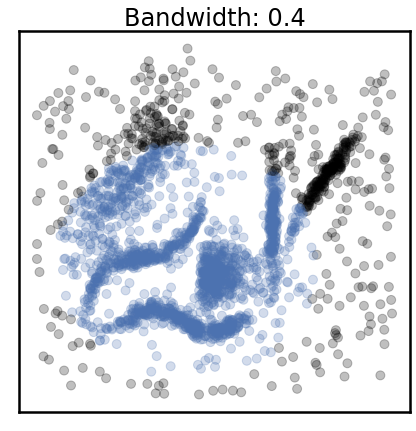

In [ ]:
plot_clusters(synth_data, cluster.MeanShift, (0.4,), {'cluster_all':False})

Number of clusters: 2
Clustering took 17.80 s
Silhouette Coefficient: 0.3174812531500921


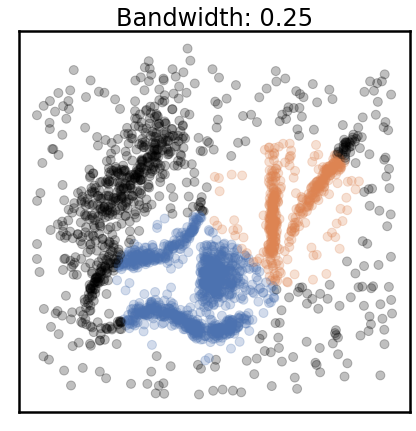

In [ ]:
plot_clusters(synth_data, cluster.MeanShift, (0.25,), {'cluster_all':False})

Number of clusters: 5
Clustering took 16.21 s
Silhouette Coefficient: 0.25927139015163575


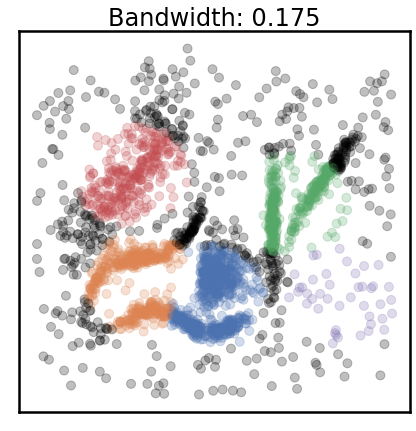

In [ ]:
plot_clusters(synth_data, cluster.MeanShift, (0.175,), {'cluster_all':False})

Number of clusters: 23
Clustering took 16.11 s
Silhouette Coefficient: 0.14639656622758118


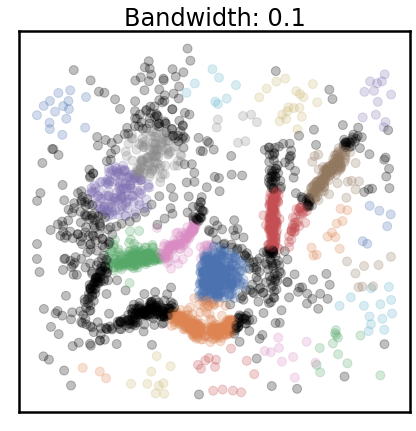

In [ ]:
plot_clusters(synth_data, cluster.MeanShift, (0.1,), {'cluster_all':False})

Number of clusters: 116
Clustering took 11.95 s
Silhouette Coefficient: 0.15563941382725666


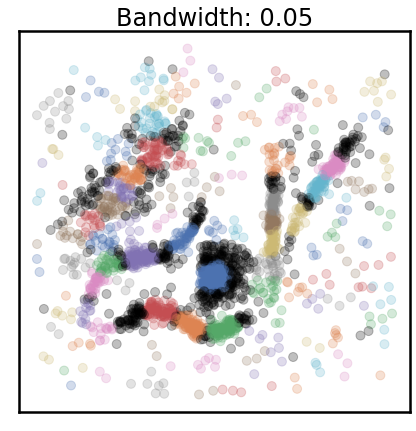

In [ ]:
plot_clusters(synth_data, cluster.MeanShift, (0.05,), {'cluster_all':False})

As bandwidth increases, the number of clusters found decreases. This is expected as bandwidth essentially determines the search neighborhood of the algorithm. A smaller bandwidth would mean a smaller search neighborhood and so even after shifting to a local density maxima, there will still be a lot of uncovered points that would then be covered by other generated clusters. This will in turn lead to a lot of clusters. 

As for the time taken for the algorithm, it appears to require more time with a median bandwidth value. This is probably because with such a bandwidth, it will result in quite a bit of possible shifting of the centroid so it requires more iterations to eventually reach the local density maxima. 

The silhouette coefficient appears to increase as bandwidth increases, but it cannot be used here as a proper performance metric as the clusters obtained themselves are not correct due to the globular assumption and so the resulting metric calculation is not reflective of the actual quality of clusters. 


**Evaluation of Algorithm**
* **Performance**: It is rather slow and does not scale well with larger datasets with more features
* **Correctness**: Mean Shift doesn’t cluster every point meaning that random noise is not pulled into clusters. But due to how the search region is defined, it still tries to find globular-shaped clusters and so elongated clusters might get cut off or combined. 
* **Ease of Parameter Tuning**: Mean shift’s bandwidth parameter makes more sense to use compared to giving an arbitrary k value for K-Means, since we know it is defining the exact size of the search region. 
* **Deterministic**: The results are highly dependent on the bandwidth. For the same bandwidth across different runs, due to random initialization, there might be some variation in results.




# DBSCAN
The DBSCAN algorithm defines clusters to be regions of high density with regions of low density between them. This means that there are no implicit assumptions about the shape of a cluster, and a cluster is solely dependent on the density. This is in contrast to the other two algorithms we have explored above, which assumes a globular shape for clusters. DBSCAN makes extensive use of the concept of a core point or a core sample, which are samples that are in high density regions. A cluster is essentially a set of core points that are close to one another, where the closeness is measured by some sort of distance function, as well as a set of border points which are reachable from the core points.

The DBSCAN algorithm requires two parameters to be defined by the user: minimumPoints (minPts) and epsilon (eps). These two parameters collectively define what it means for a region to be of high density, i.e. what it means for a region to be collectively called a cluster. minPts refers to the minimum number of points required to constitute one cluster, while epsilon is a distance whereby two points are considered to belong to the same neighborhood (and potentially a cluster) if they have a distance lesser or equal than it. Intuitively, this means that a high minPts value or a small eps value would set a high requirement for a dense region to be considered a cluster.

A core point is a data point whereby there are at least minPts data points within the region of radius eps from the core point. This region of radius eps is defined as the neighborhood of the core point. To build a cluster, we can recursively take a core point, and then find its neighbouring points, then perform the same neighborhood search on the newly discovered core points in the region. This will eventually cause all the reachable core points and non-core/border points to be in the cluster. Naturally, there will also be noise/outlier points which are not reachable by any core point. These points are rightfully left untouched by the algorithm.

The magnitude of minPts affects how noise is handled by the algorithm. With large/noisy datasets, to make sure enough non-noise points are in a cluster, the user may wish to set a high value for minPts. As for eps, it is the more critical parameter to choose wisely as it essentially controls how many points will end up being included in one cluster by virtue of the search region. If it is too large, it might end up causing several independent yet close clusters to be combined together. If it is too small, it might cause fragmentation amongst a single cluster. 

The benefits of DBSCAN are as such:
* There is no need to specify the number of clusters beforehand, and the clusters are automatically found by the algorithm
* It performs well with arbitrary cluster shapes since it does not assume a globular shape cluster for all clusters. 
* It is robust to outliers/noise and able to detect outliers/noise easily. 

The drawbacks of DBSCAN are as such:
* Epsilon can be hard to pick and DBSCAN is rather sensitive to changes in this value. Picking a good value might require domain knowledge and is a non-trivial task.
* As minPts and eps collectively determine the density threshold to determine whether a region is a cluster or not, this also means that there is only one threshold. If the dataset had clusters of varying densities, then DBSCAN will not perform well on those clusters. It will either miss them, combine them or fragment them depending on the density value.





In [ ]:
def plot_clusters(data, algorithm, args, kwds, groundTruths = None):
    # Measure time
    start_time = time.time()
    # Get clusters
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)
    # Measure time
    end_time = time.time()
    print(f"Number of clusters: {len(np.unique(labels))-1}")
    # Plot the clusters using a scatter plot
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Epsilon {}'.format(str(kwds['eps'])), fontsize=24)
    #plt.text(-0.5, 0.6, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    print('Clustering took {:.2f} s'.format(end_time - start_time))
    #print(f"No. of Iterations Run for Best Result: {kmeans.n_iter_}")
    #print(f"Inertia of Best Result: {kmeans.inertia_}")
    if not groundTruths:
        print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels, metric='euclidean')}")
    else:
        print(f"Fowlkes-Mallows Index: {metrics.fowlkes_mallows_score(groundTruths, labels)}")

### Varying Epsilon

The experiments were run with the minPts set to 5, which is the default for scikitlearn. As seen in the table and figure, as epsilon increased, the number of clusters decreased. This is expected as epsilon determines the neighbourhood region for the core points, so the greater the epsilon, the more likely that the previously out of reach core and border points are now within reach, the larger the cluster. The results suggest that the algorithm is quite sensitive to changes in the epsilon values. An epsilon value of 0.025 seems to work best amongst the values tested, giving four main clusters and four smaller clusters in total. Out of all the methods attempted so far, this algorithm is the first one to be able to handle non globular clusters and so it visually performs much better than the other algorithms. 

It is also much faster, taking less than 0.05 seconds for each of the experiments. This is a stark contrast to K-Means and Mean Shift clustering which averages to around 0.5 seconds and 15 seconds respectively from the results in tables above.

One notable point is that the silhouette score seems very strange in the table below. This is because silhouette score does not work well with non-globular/convex shaped clusters and this causes these density based, elongated clusters to not be as well perceived by the performance metric. The reason for this discrepancy lies in how the score is calculated. It takes into account the distance of one point to other points in the cluster. But in the case of non-globular/convex clusters, the distance can be rather large yet still belong to the same cluster.


Number of clusters: 66
Clustering took 0.03 s
Silhouette Coefficient: -0.36940766888671145


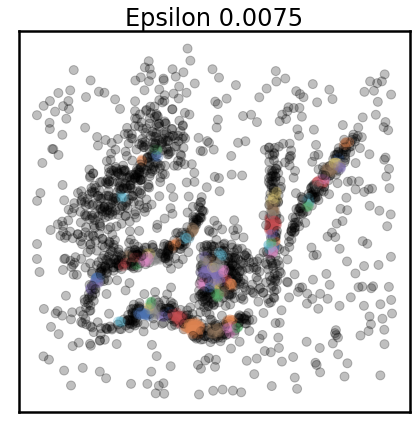

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.0075, 'min_samples': 5})

Number of clusters: 33
Clustering took 0.03 s
Silhouette Coefficient: -0.22381705908303431


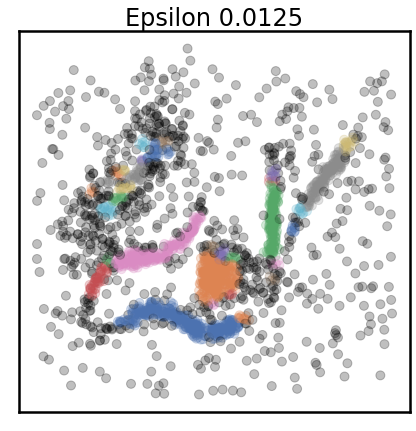

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.0125, 'min_samples': 5})

Number of clusters: 8
Clustering took 0.04 s
Silhouette Coefficient: 0.014536877002387878


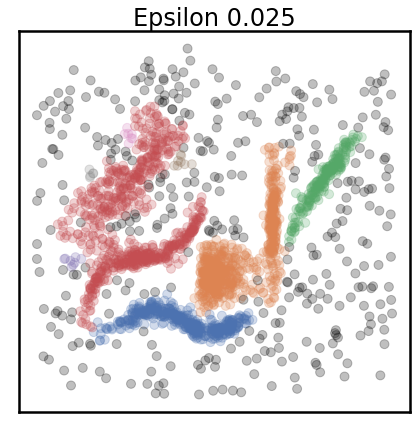

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.025})

Number of clusters: 7
Clustering took 0.04 s
Silhouette Coefficient: -0.30602759957145587


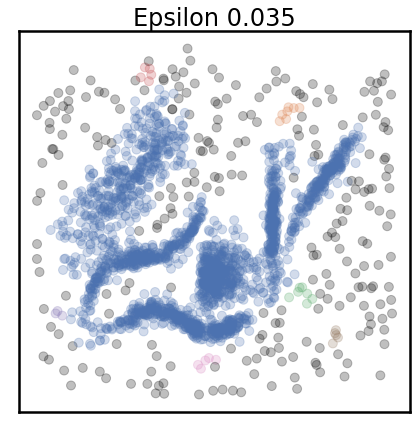

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.035})

Number of clusters: 13
Clustering took 0.05 s
Silhouette Coefficient: -0.4282058739439093


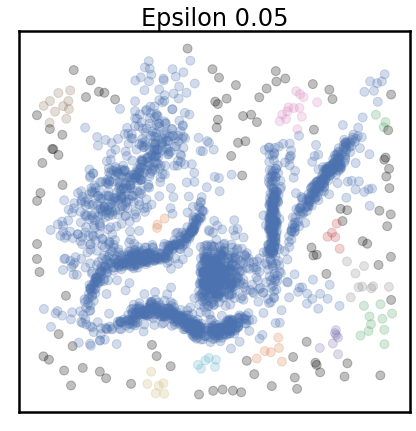

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.05})

### Varying MinPts

The experiments were run with epsilon set to 0.025 as this gave the best performance in terms of number of clusters found for the previous experiment. The results as seen in the figure and table suggest that the MinPts value is not as sensitive as epsilon, and does not heavily impact the algorithm as much as epsilon, unless the value is at an extreme low or extreme high. For instance, at 1, the number of clusters expectedly skyrocketed to 243 and at the other end with 50, the number of clusters expectedly is very low at 2, since there are just not that many dense regions in the dataset. 

The time taken does not change much across the different values as expected, since it does not affect to a large extent how many different steps are executed since all the points need to be visited anyway. The silhouette score is expectedly janky as explained in the previous experiment. 


In [ ]:
def plot_clusters(data, algorithm, args, kwds, groundTruths = None):
    # Measure time
    start_time = time.time()
    # Get clusters
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)
    # Measure time
    end_time = time.time()
    print(f"Number of clusters: {len(np.unique(labels))-1}")
    # Plot the clusters using a scatter plot
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('MinPts {}'.format(str(kwds['min_samples'])), fontsize=24)
    #plt.text(-0.5, 0.6, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    print('Clustering took {:.2f} s'.format(end_time - start_time))
    #print(f"No. of Iterations Run for Best Result: {kmeans.n_iter_}")
    #print(f"Inertia of Best Result: {kmeans.inertia_}")
    if not groundTruths:
        print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels, metric='euclidean')}")
    else:
        print(f"Fowlkes-Mallows Index: {metrics.fowlkes_mallows_score(groundTruths, labels)}")

Number of clusters: 243
Clustering took 0.04 s
Silhouette Coefficient: -0.612031678581455


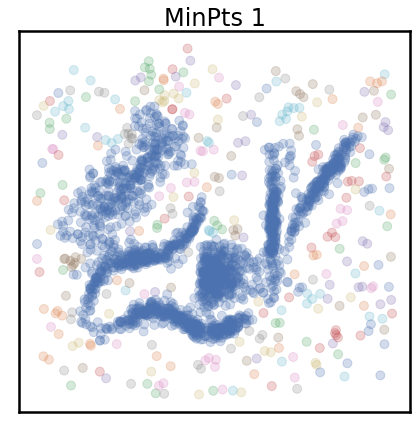

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.025, 'min_samples': 1})

Number of clusters: 8
Clustering took 0.04 s
Silhouette Coefficient: 0.014536877002387878


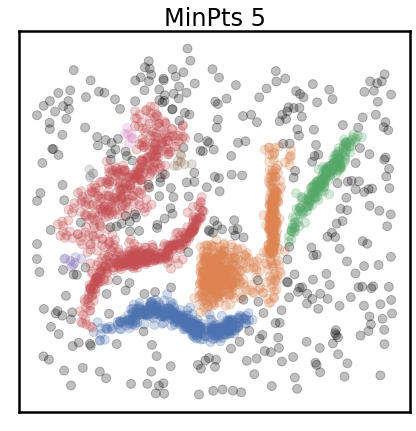

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.025, 'min_samples': 5})

Number of clusters: 11
Clustering took 0.05 s
Silhouette Coefficient: 0.013404992405933973


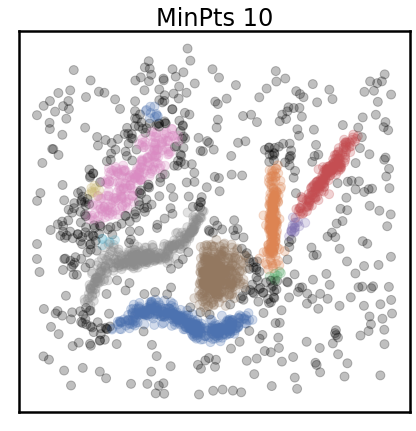

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.025, 'min_samples': 10})

Number of clusters: 7
Clustering took 0.20 s
Silhouette Coefficient: 0.10906776551497492


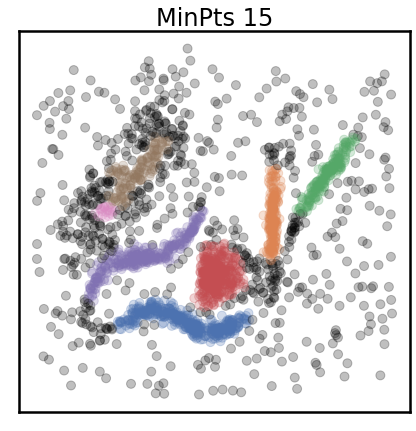

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.025, 'min_samples': 15})

Number of clusters: 7
Clustering took 0.06 s
Silhouette Coefficient: 0.025089545157824304


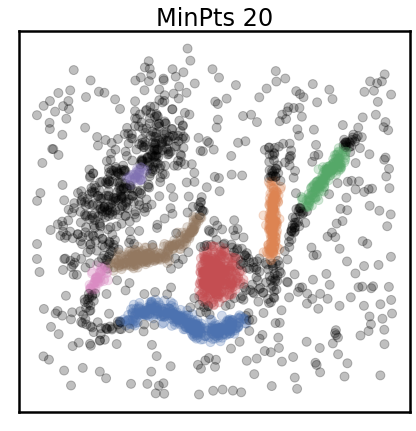

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.025, 'min_samples': 20})

Number of clusters: 7
Clustering took 0.05 s
Silhouette Coefficient: 0.0184397031896078


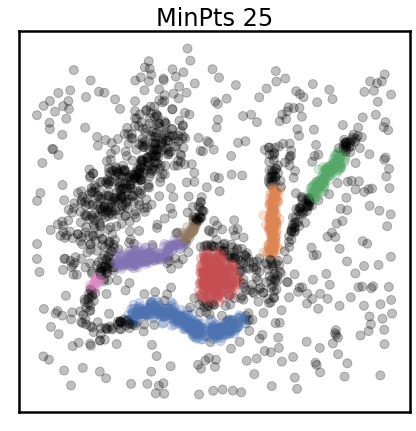

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.025, 'min_samples': 25})

Number of clusters: 8
Clustering took 0.05 s
Silhouette Coefficient: -0.0868793648598978


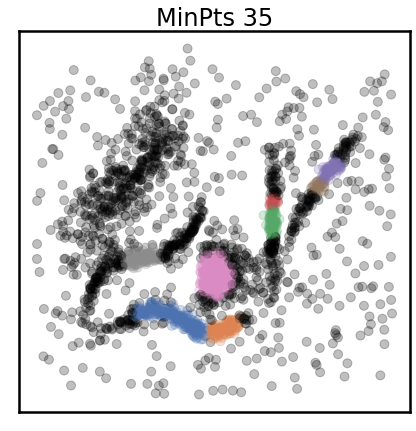

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.025, 'min_samples': 35})

Number of clusters: 2
Clustering took 0.03 s
Silhouette Coefficient: -0.18764970661735356


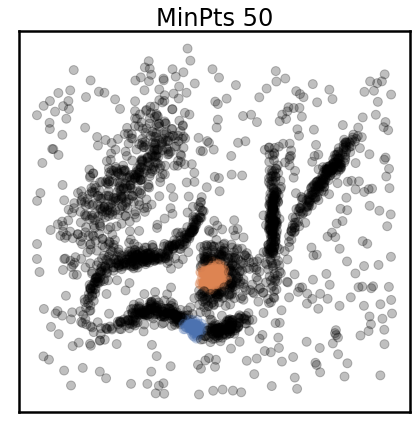

In [ ]:
plot_clusters(synth_data, cluster.DBSCAN, (), {'eps':0.025, 'min_samples': 50})

**Evaluation of Algorithm**
* **Performance**: DBSCAN is rather fast and has a lot of optimizations possible through the usage of trees and other data structures
* **Correctness**: Without the requirement for clusters to be globular and with noise being ignored correctly, DBSCAN would usually correctly assign the correct cluster as long as clusters are of similar densities. 
* **Ease of Parameter Tuning**: Epsilon is a distance value, so to determine it, the user could canvass the distribution of distances in the dataset to get a rough estimate of a good value for epsilon. Nonetheless, it is still a non-trivial task to find a good epsilon value. MinPts is also another parameter that is non-trivial in finding a good value for.
* **Deterministic**: DBSCAN would produce the same cluster assignments across different runs for the same epsilon and minPts values. But of course, it will change if the epsilon and minPts value change since that would define clusters to be of another density threshold. 


# HDBSCAN
HDBSCAN is an algorithm that is an extension of DBSCAN and is created by the same authors of DBSCAN. It extends DBSCAN by converting the density based clustering algorithm into a hierarchical clustering algorithm. The objective of HDBSCAN was to overcome the main drawback of DBSCAN which was that it only allowed one density threshold to be defined based on the epsilon and minPts parameters. This caused DBSCAN to not perform well on data where clusters are of varying densities.

The benefits of HDBSCAN are as such:
* There can now be clusters with varying density values which DBSCAN did not support. 
* There is no longer a need to define any epsilon since the density threshold is automatically and varyingly chosen by the algorithm.

The drawbacks of HDBSCAN are as such:
* Choosing minPts might not be intuitive. 



In [ ]:
!pip install hdbscan

     |████████████████████████████████| 6.4 MB 6.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311901 sha256=2c954c4cdf55c09c18851380ed2ceb51420571de0d1d4506fd4e58014602b6c4
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [ ]:
def plot_clusters(data, algorithm, args, kwds, groundTruths = None):
    # Measure time
    start_time = time.time()
    # Get clusters
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)
    # Measure time
    end_time = time.time()
    print(f"Number of clusters: {len(np.unique(labels))-1}")
    # Plot the clusters using a scatter plot
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('MinClusterSize {}'.format(str(kwds['min_cluster_size'])), fontsize=24)
    #plt.text(-0.5, 0.6, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    print('Clustering took {:.2f} s'.format(end_time - start_time))
    #print(f"No. of Iterations Run for Best Result: {kmeans.n_iter_}")
    #print(f"Inertia of Best Result: {kmeans.inertia_}")
    if not groundTruths:
        print(f"Silhouette Coefficient: {metrics.silhouette_score(data, labels, metric='euclidean')}")
    else:
        print(f"Fowlkes-Mallows Index: {metrics.fowlkes_mallows_score(groundTruths, labels)}")

## Varing MinClusterSize

Number of clusters: 36
Clustering took 0.11 s
Silhouette Coefficient: -0.02081098785645404


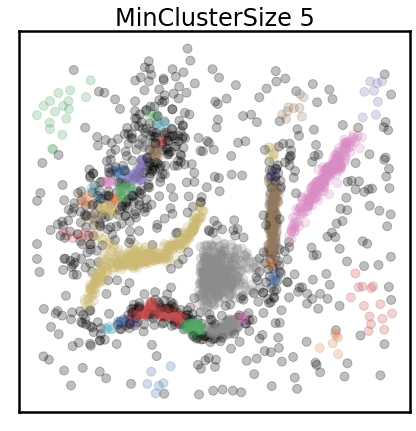

In [ ]:
plot_clusters(synth_data, hdbscan.HDBSCAN, (), {'min_cluster_size':5})

Number of clusters: 9
Clustering took 0.12 s
Silhouette Coefficient: 0.17622186684184607


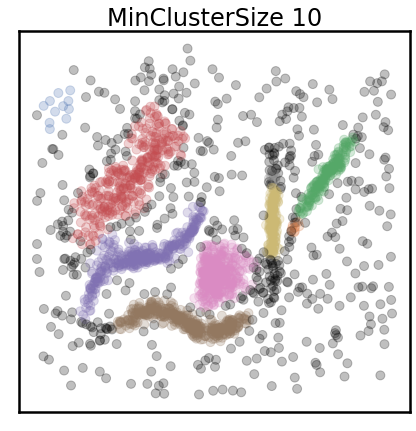

In [ ]:
plot_clusters(synth_data, hdbscan.HDBSCAN, (), {'min_cluster_size':10})

Number of clusters: 6
Clustering took 0.11 s
Silhouette Coefficient: 0.2131120585461632


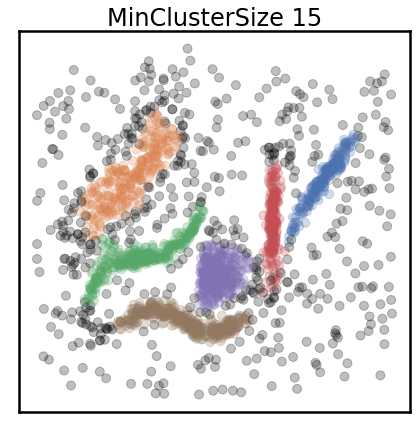

In [ ]:
import hdbscan
plot_clusters(synth_data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

Number of clusters: 6
Clustering took 0.12 s
Silhouette Coefficient: 0.24290156863867254


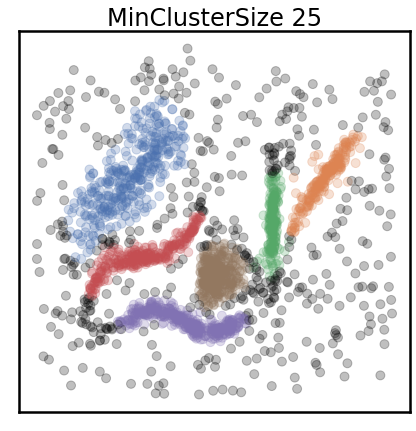

In [ ]:
plot_clusters(synth_data, hdbscan.HDBSCAN, (), {'min_cluster_size':25})

Number of clusters: 6
Clustering took 0.14 s
Silhouette Coefficient: 0.1484280687813458


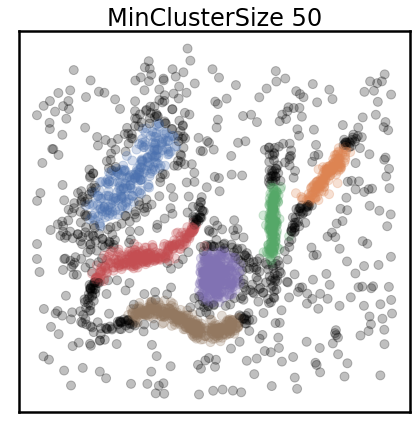

In [ ]:
plot_clusters(synth_data, hdbscan.HDBSCAN, (), {'min_cluster_size':50})

Number of clusters: 6
Clustering took 0.17 s
Silhouette Coefficient: 0.09411484361788675


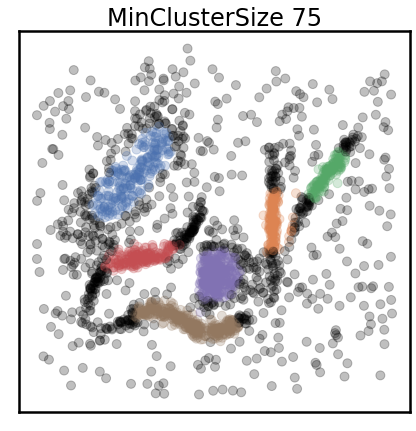

In [ ]:
plot_clusters(synth_data, hdbscan.HDBSCAN, (), {'min_cluster_size':75})

Number of clusters: 5
Clustering took 0.19 s
Silhouette Coefficient: 0.03186572255675282


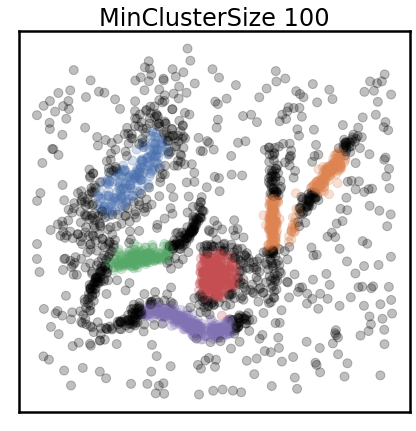

In [ ]:
plot_clusters(synth_data, hdbscan.HDBSCAN, (), {'min_cluster_size':100})

Number of clusters: 4
Clustering took 0.22 s
Silhouette Coefficient: -0.01938891882641824


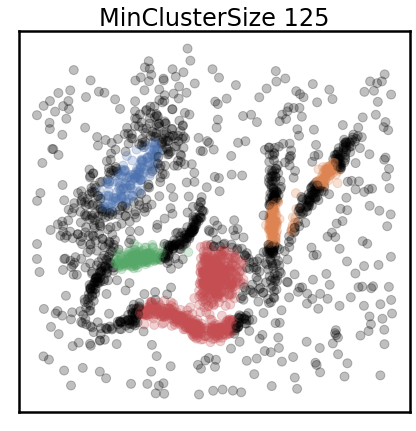

In [ ]:
plot_clusters(synth_data, hdbscan.HDBSCAN, (), {'min_cluster_size':125})

**Evaluation of Algorithm**
* **Performance**: HDBSCAN is quite efficiently implemented, and DBSCAN itself is already really fast compared to other algorithms.
* **Correctness**: HDBSCAN has the correctness of DBSCAN which was already superior to other methods explored, and on top of it, it is also able to correctly handle clusters of different densities, making it the most correct algorithm we have explored so far.
* **Ease of Parameter Tuning**: Choosing minClusterSize is intuitive. minPts might still not be intuitive to choose, but it is a definite improvement over DBSCAN. 
* **Deterministic**: HDBSCAN produces the same/very similar results over multiple random seeds and across various parameters as well.

# Iris Dataset

The Iris dataset is a well-known dataset that involves four attributes about a flower. The type of flower is also given and there are three types. This dataset can be used in clustering as a relatively simple dataset whereby the objective is to cluster based on the four attributes into the three different clusters, each one representing one type of flower.

To find the optimal parameters, we did a linear search for algorithms which required only one parameter, and a grid search for those that required two parameters. FMI was used as the metric as for this dataset, we do have ground truths in the form of flower labels. There should be 3 clusters corresponding to 3 labels.

The results show that except for the case of K-Means where the number of clusters was predefined beforehand, the other algorithms all failed to find three clusters. Nonetheless, the FMI itself was quite comparable. This suggests that even though K-Means found the correct number of clusters, it failed to correctly assign clusters at almost around the same rate as other algorithms. The time taken for the execution of these algorithms are in the same pattern as what has been seen across earlier experiments, with mean shift clustering taking the longest, and DBSCAN being the quickest.

To dive deeper into why the algorithms perform as they did on the Iris Dataset, we plotted the dataset in various visualizations. The visualizations in Figure x below show a 3D plot of 3 out of the 4 features, and a 2D plot of the 4th feature not in the 3D plot against one of the features. We observe that two of the clusters (green and orange in the 3D plot, and yellow and green in the 2D plot) tend to be very close to each other. To the layperson, it might as well seem like the two clusters form a single cluster. In terms of density, they are also quite similar and since they are already intersecting each other to some extent, it is likely that DBSCAN and HDBSCAN both perceived it as one large cluster of a very similar density, causing them to only have 2 clusters in the end.

It should also be noted that the Iris dataset has no noise and the clusters are of rather uniform densities. This makes it rather easy for all the four algorithms to perform clustering on it.


In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X, Y = iris.data, iris.target

print("Features : ", iris.feature_names)
print("Target : ", iris.target_names)
print('Dataset Size : ', X.shape, Y.shape)

Features :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target :  ['setosa' 'versicolor' 'virginica']
Dataset Size :  (150, 4) (150,)


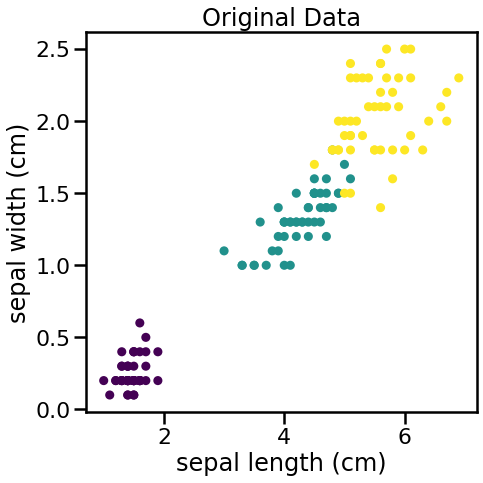

In [ ]:
plt.scatter(X[:,0],X[:,1], c = Y, marker="o", s=50)
plt.rcParams["figure.figsize"] = (7,7)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Original Data");

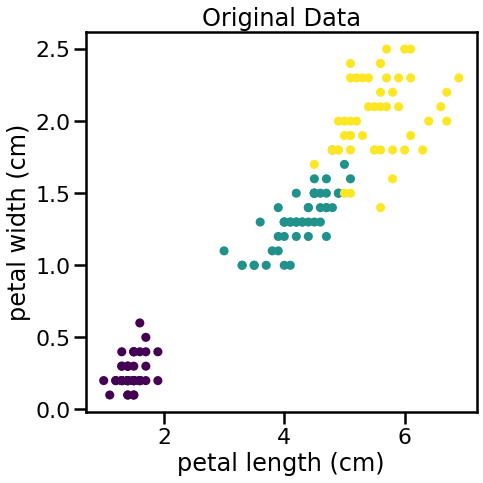

In [ ]:
plt.scatter(X[:,2],X[:,3], c = Y, marker="o", s=50)
plt.rcParams["figure.figsize"] = (7,7)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title("Original Data");

In [ ]:
def plot_clusters(data, algorithm, args, kwds, groundTruths = None, verbose = True):
    # Measure time
    start_time = time.time()
    # Get clusters
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)
    # Measure time
    end_time = time.time()
    fmi = metrics.fowlkes_mallows_score(groundTruths, labels)
    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Fowlkes-Mallows Index: {fmi}")
    return fmi, len(np.unique(labels))

### K-Means

In [ ]:
plot_clusters(X, cluster.KMeans, (), {'n_clusters':3, 'init':'k-means++', 'verbose': 0}, groundTruths=Y)

Number of clusters: 3
Clustering took 0.05 s
Fowlkes-Mallows Index: 0.8208080729114153


(0.8208080729114153, 3)

### DBSCAN

In [ ]:
scores = []
max_score = 0
max_eps = 0
max_minSampels = 0
for i in range(1,500):
    eps = 0.005*i
    for min_samples in range(10,30):
        score, numClustersFound = plot_clusters(X, cluster.DBSCAN, (), {'eps':eps, 'min_samples': min_samples}, groundTruths=Y, verbose = False)
        if score > max_score:
            print(score,eps,min_samples,numClustersFound)
            max_score = score
            max_eps = eps
            max_minSampels = min_samples
print(max_score, max_eps, min_samples)


0.5734623443633283 0.005 10
0.6145098677990269 0.305 10
0.6383673106536257 0.32 10
0.6471446964978528 0.335 10
0.6864383783686882 0.365 10
0.6973153092026206 0.39 12
0.7292025274600085 0.46 10
0.8003221575933452 0.46 11
0.8060241054696942 0.56 19
0.8060241054696942 0.56 29


In [ ]:
plot_clusters(X, cluster.DBSCAN, (), {'eps':0.56, 'min_samples': 19}, groundTruths=Y)

Number of clusters: 3
Clustering took 0.01 s
Fowlkes-Mallows Index: 0.8060241054696942


(0.8060241054696942, 3)

### Mean Shift

In [ ]:
maxScore = 0

for i in range(1,500):
    val = 0.05*i
    score, numClustersFound = plot_clusters(X, cluster.MeanShift, (val,), {'cluster_all':True},groundTruths=Y, verbose = False)
    if score > maxScore:
        maxScore = score
        print(score, val, numClustersFound)


In [ ]:
plot_clusters(X, cluster.MeanShift, (0.8,), {'cluster_all':True},groundTruths=Y)

Number of clusters: 4
Clustering took 0.94 s
Fowlkes-Mallows Index: 0.8607856227302321


(0.8607856227302321, 4)

### HDBSCAN

In [ ]:
import hdbscan
maxScore = 0
for i in range(2,250):
    score, numClustersFound = plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size':i},groundTruths=Y, verbose = False)
    if score > maxScore:
        maxScore = score
        print(score, i, numClustersFound)

0.7714542762891773 2 2


In [ ]:
plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size':2}, groundTruths=Y, verbose = True)

Number of clusters: 2
Clustering took 0.02 s
Fowlkes-Mallows Index: 0.7714542762891773


(0.7714542762891773, 2)

In [ ]:
plot_clusters(iris_data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

Number of clusters: 2


# Wine Dataset

The Wine dataset is another well-known dataset that involves 13 attributes about wines, with each data case being classified into one of three wine types. This naturally gives us three clusters, with known ground truths. As there are 13 attributes, it is not visualizable, so we will have to rely only on metrics which is FMI in this case since ground truth is known.

We can see that MeanShift appears to perform the best with a FMI of around 0.7, followed by DBSCAN, and then HDBSCAN, and lastly K-Means. The results were obtained after a linear/grid search just like in the earlier experiment for the optimal parameters of the algorithms.

Only K-Means and HDBSCAN were able to identify three clusters while the other two algorithms only identified 2. DBSCAN identifying two clusters and HDBSCAN identifying three clusters suggest the possibility of two of the clusters being close together in feature space with slightly different densities. HDBSCAN’s heuristic likely made the difference, and split the two clusters up to give three clusters in total. 

It is also notable that the parameters are vastly different in terms of magnitude from the previous experiment, even though the magnitude of the features themselves are comparable to the Iris dataset. 


In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
X, Y = wine.data, wine.target
print("Features : ", wine.feature_names)
print("Target : ", wine.target_names)
print('Dataset Size : ', X.shape, Y.shape)

Features :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target :  ['class_0' 'class_1' 'class_2']
Dataset Size :  (178, 13) (178,)


In [ ]:
def plot_clusters(data, algorithm, args, kwds, groundTruths = None, verbose = True):
    # Measure time
    start_time = time.time()
    # Get clusters
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)
    # Measure time
    end_time = time.time()
    fmi = metrics.fowlkes_mallows_score(groundTruths, labels)
    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Fowlkes-Mallows Index: {fmi}")
    return fmi, len(np.unique(labels))

In [ ]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

### K-Means

In [ ]:
plot_clusters(X, cluster.KMeans, (), {'n_clusters':3, 'init':'k-means++', 'verbose': 0}, groundTruths=Y)

Number of clusters: 3
Clustering took 0.06 s
Fowlkes-Mallows Index: 0.5835370218944976


(0.5835370218944976, 3)

### DBSCAN

In [ ]:
scores = []
max_score = 0
max_eps = 0
max_minSampels = 0
for i in range(1,500):
    eps = i
    for min_samples in range(1,30):
        score, numClustersFound = plot_clusters(X, cluster.DBSCAN, (), {'eps':eps, 'min_samples': min_samples}, groundTruths=Y, verbose = False)
        if score > max_score:
            print(score,eps,min_samples,numClustersFound)
            max_score = score
            max_eps = eps
            max_minSampels = min_samples
print(max_score, max_eps, min_samples)


0.5813496119327479 1 2 1
0.6127824544375371 31 12 2
0.6239724529744082 36 14 2
0.6356177482793325 37 14 2
0.6458124607739675 40 14 2
0.6651883789440362 41 15 2
0.6691583441834973 42 15 2
0.6759157723703192 43 15 2
0.6759157723703192 43 29


In [ ]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
plot_clusters(X, cluster.DBSCAN, (), {'eps':43, 'min_samples': 15}, groundTruths=Y)

Number of clusters: 2
Clustering took 0.01 s
Fowlkes-Mallows Index: 0.6759157723703192


(0.6759157723703192, 2)

### Mean Shift

In [ ]:
maxScore = 0

for i in range(100,1000):
    val = i
    score, numClustersFound = plot_clusters(X, cluster.MeanShift, (val,), {'cluster_all':True},groundTruths=Y, verbose = False)
    if score > maxScore:
        maxScore = score
        print(score, val, numClustersFound)


In [ ]:
plot_clusters(X, cluster.MeanShift, (208,), {'cluster_all':True},groundTruths=Y)

Number of clusters: 2
Clustering took 1.34 s
Fowlkes-Mallows Index: 0.7048497969743832


(0.7048497969743832, 2)

### HDBSCAN

In [ ]:
import hdbscan
maxScore = 0
for i in range(2,500):
    score, numClustersFound = plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size':i},groundTruths=Y, verbose = False)
    if score > maxScore:
        maxScore = score
        print(score, i, numClustersFound)

0.23787272852577235 2 22
0.5654099423619122 3 6
0.5679376082657129 10 4
0.5680742466914277 12 4
0.5870874026194963 13 3


In [ ]:
plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size':13}, groundTruths=Y, verbose = True)

Number of clusters: 3
Clustering took 0.01 s
Fowlkes-Mallows Index: 0.5870874026194963


(0.5870874026194963, 3)

In [ ]:
plot_clusters(iris_data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

Number of clusters: 2


# Mall Customer Segmentation Dataset
This dataset is from Kaggle and is from the commerce domain. It contains information on 200 customers such as age, gender, income and spending levels. The usefulness of clustering in this dataset is to get different customer segments to launch targeted advertising campaigns and promotions towards, based on spending levels.

For this dataset, the results show that the density based clustering algorithms perform rather badly, with both DBSCAN and HDBSCAN giving very strange and non-meaningful results as seen in the visualization. K-Means and Mean Shift appear to give the best results in terms of visualization and silhouette coefficient score. This discrepancy in performance is likely due to the entire feature space being of rather the same density and the clusters not having clear separations. This causes DBSCAN and HDBSCAN to start connecting points in different clusters together since it is still within the same neighborhood region, and they allow for non-globular clusters. Mean Shift and K-Means on the other hand assume globular clusters, and it just so happens that the clusters in this dataset are globular, so they are able to perform very well. 

This shows that different algorithms are suitable under different contexts and we should not apply a blanket approach of using one algorithm only to every dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Mall_Customers.csv')
df.rename(index=str, columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'}, inplace=True)
X = df.drop(['CustomerID', 'Gender'], axis=1)


### Finding K

In [ ]:
score = []
S = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    score.append(kmeans.inertia_)
    S.append(metrics.silhouette_score(X, labels, metric='euclidean'))
score

[212840.16982097185,
 143342.751571706,
 104366.15145556198,
 75372.4523788002,
 58300.44332159069,
 51133.031385281385,
 44312.46881207721,
 40623.36547212477,
 37376.395770296665]

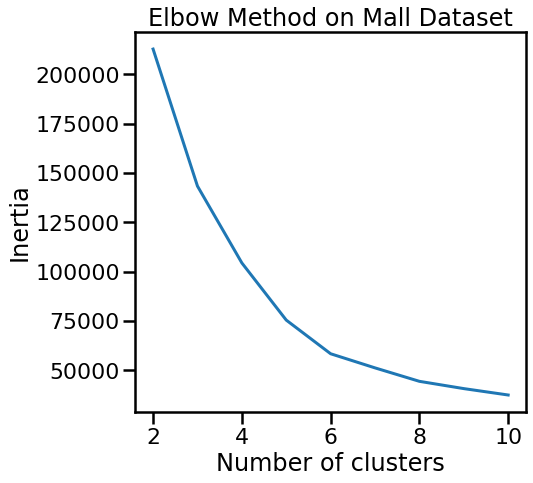

In [ ]:
plt.plot(range(2, 11), score)
plt.title('Elbow Method on Mall Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') 
plt.show()

In [ ]:
def plot_clusters(data, algorithm, args, kwds, verbose = True):
    # Measure time
    start_time = time.time()
    # Get clusters
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)
    # Measure time
    end_time = time.time()
    
    sc = metrics.silhouette_score(data, labels, metric='euclidean')
    if verbose:
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        print(f"Silhouette Coefficient: {sc}")
    return sc, len(np.unique(labels))

### K-Means

In [ ]:
plot_clusters(X, cluster.KMeans, (), {'n_clusters':3, 'init':'k-means++', 'verbose': 0})

Number of clusters: 3
Clustering took 0.06 s
Silhouette Coefficient: 0.3839349967742105


(0.3839349967742105, 3)

In [ ]:
plot_clusters(X, cluster.KMeans, (), {'n_clusters':4, 'init':'k-means++', 'verbose': 0})

Number of clusters: 4
Clustering took 0.07 s
Silhouette Coefficient: 0.40546302077733304


(0.40546302077733304, 4)

In [ ]:
plot_clusters(X, cluster.KMeans, (), {'n_clusters':5, 'init':'k-means++', 'verbose': 0})

Number of clusters: 5
Clustering took 0.09 s
Silhouette Coefficient: 0.44428597560893024


(0.44428597560893024, 5)

In [ ]:
plot_clusters(X, cluster.KMeans, (), {'n_clusters':6, 'init':'k-means++', 'verbose': 0})

Number of clusters: 6
Clustering took 0.09 s
Silhouette Coefficient: 0.4523443947724053


(0.4523443947724053, 6)

In [ ]:
plot_clusters(X, cluster.KMeans, (), {'n_clusters':7, 'init':'k-means++', 'verbose': 0})

Number of clusters: 7
Clustering took 0.10 s
Silhouette Coefficient: 0.44125523526699084


(0.44125523526699084, 7)

In [ ]:
plot_clusters(X, cluster.KMeans, (), {'n_clusters':8, 'init':'k-means++', 'verbose': 0})

Number of clusters: 8
Clustering took 0.09 s
Silhouette Coefficient: 0.42627498428462474


(0.42627498428462474, 8)

In [ ]:
X

Age  Income  Score  Labels
0     19      15     39       2
1     21      15     81       3
2     20      16      6       2
3     23      16     77       3
4     31      17     40       2
..   ...     ...    ...     ...
195   35     120     79       4
196   45     126     28       0
197   32     126     74       4
198   32     137     18       0
199   30     137     83       4

[200 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


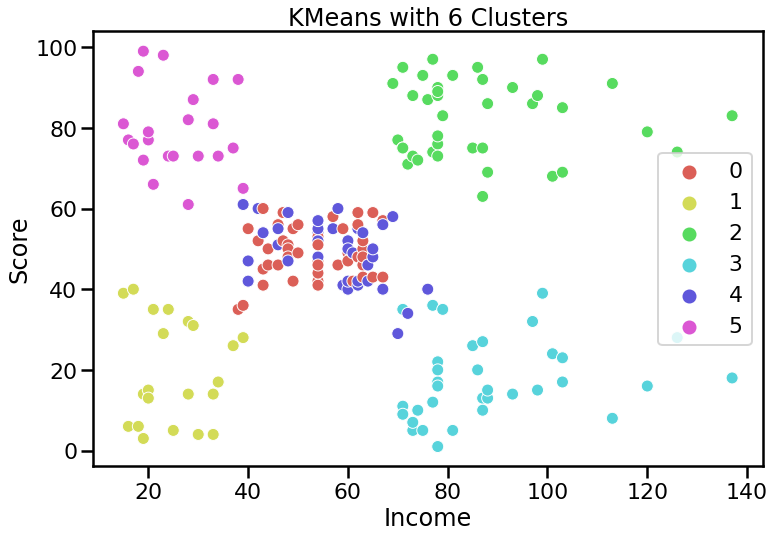

In [ ]:
km = cluster.KMeans(n_clusters=6).fit(X)

X['Labels'] = km.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=km.labels_, 
                palette=sns.color_palette('hls', 6))
plt.title('KMeans with 6 Clusters')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_3d(X, x='Age', y='Income', z='Score', color='Labels', symbol='Labels', )
fig.show()

### DBSCAN

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.rename(index=str, columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'}, inplace=True)
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [ ]:
def plot_clusters(data, algorithm, args, kwds, verbose = True):
    # Measure time
    start_time = time.time()
    # Get clusters
    algo = algorithm(*args, **kwds).fit(data)
    labels = algo.fit_predict(data)
    # Measure time
    end_time = time.time()
    try:
        sc = metrics.silhouette_score(data, labels, metric='euclidean')
    except:
        sc = 0
    if verbose:
        # print(kwds)
        # print(labels)
        print(f"Number of clusters: {len(np.unique(labels))}")
        print('Clustering took {:.2f} s'.format(end_time - start_time))    
        #print(f"Silhouette Coefficient: {sc}")
    #sc = 0
    return sc, len(np.unique(labels))

In [ ]:
plot_clusters(X, cluster.DBSCAN, (), {'eps':26, 'min_samples': 10}, verbose = True)

Number of clusters: 2
Clustering took 0.01 s


(0.40664290467512737, 2)

In [ ]:
scores = []
max_score = 0
max_eps = 0
max_minSampels = 0
for i in range(1,500):
    eps = i
    for min_samples in range(1,30):
        score, numClustersFound = plot_clusters(X, cluster.DBSCAN, (), {'eps':eps, 'min_samples': min_samples}, verbose = False)
        if score > max_score:
            print(score,eps,min_samples,numClustersFound)
            max_score = score
            max_eps = eps
            max_minSampels = min_samples
print(max_score, max_eps, min_samples)


0.015971133185708225 1 1 198
0.031239979604215345 2 1 195
0.08386914557632379 3 1 182
0.12176212973616658 4 1 168
0.14748034866035234 5 1 134
0.17123030852904095 10 2 19
0.19707521745228654 10 6 4
0.20675480670600443 12 7 5
0.2307235129011429 13 6 5
0.23179408586272146 13 9 5
0.24736967281440447 13 11 4
0.28921376250495007 14 3 3
0.2916078220632494 15 3 3
0.3049360034125826 16 1 3
0.3490210037628495 16 3 2
0.3689431568176554 16 4 2
0.39088488327271015 18 1 2
0.40664290467512737 26 10 2
0.40664290467512737 26 29


In [ ]:
import copy
db = cluster.DBSCAN(eps=12, min_samples = 7).fit(X)
cp = copy.deepcopy(X)
cp['Labels'] = db.labels_
fig = px.scatter_3d(cp, x='Age', y='Income', z='Score', color='Labels', symbol='Labels', )
fig.show()

In [ ]:
db = cluster.DBSCAN(eps=26, min_samples = 10).fit(X)
cp = copy.deepcopy(X)
cp['Labels'] = db.labels_
fig = px.scatter_3d(cp, x='Age', y='Income', z='Score', color='Labels', symbol='Labels', )
fig.show()

### Mean Shift

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.rename(index=str, columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'}, inplace=True)
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [ ]:
maxScore = 0

for i in range(1,100):
    val = i
    score, numClustersFound = plot_clusters(X, cluster.MeanShift, (val,), {'cluster_all':True},verbose = False)
    if score > maxScore:
        maxScore = score
        print(score, val, numClustersFound)


0.015971133185708225 1 198
0.031239979604215345 2 195
0.08386914557632379 3 182
0.12176212973616658 4 168
0.19361770768180853 5 140
0.21123208873662086 6 116
0.24633627473404476 7 99
0.2828573280401747 8 76
0.3042860956607128 9 67
0.3099461305513765 10 51
0.33740517714159046 15 18
0.4016120771359517 16 13
0.4019566673332317 17 12
0.4034493109635447 19 10
0.4336347553001037 20 8
0.44406073583685346 22 5


In [ ]:
plot_clusters(X, cluster.MeanShift, (22,), {'cluster_all':True})

Number of clusters: 5
Clustering took 1.30 s


(0.44406073583685346, 5)

In [ ]:
db = cluster.MeanShift(22, cluster_all = True).fit(X)
cp = copy.deepcopy(X)
cp['Labels'] = db.labels_
fig = px.scatter_3d(cp, x='Age', y='Income', z='Score', color='Labels', symbol='Labels', )
fig.show()

### HDBSCAN

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.rename(index=str, columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'}, inplace=True)
X = df.drop(['CustomerID', 'Gender'], axis=1)

In [ ]:
import hdbscan
maxScore = 0
for i in range(2,150):
    score, numClustersFound = plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size':i}, verbose = False)
    if score > maxScore:
        maxScore = score
        print(score, i, numClustersFound)

0.13290897681313582 2 22
0.1723955277599756 5 5
0.18768066068543854 6 4


In [ ]:
plot_clusters(X, hdbscan.HDBSCAN, (), {'min_cluster_size':6}, verbose = True)

Number of clusters: 4
Clustering took 0.02 s


(0.18768066068543854, 4)

In [ ]:
db = hdbscan.HDBSCAN(min_cluster_size = 6).fit(X)
cp = copy.deepcopy(X)
cp['Labels'] = db.labels_
fig = px.scatter_3d(cp, x='Age', y='Income', z='Score', color='Labels', symbol='Labels', )
fig.show()

# Discussion

A lot of the discussion is already in the previous chapter as we felt that each experiment merited its own discussion. On the whole, we observed that the clustering algorithms we have explored above have their own strengths and weaknesses and are suitable for use in different situations. Some algorithms work better with certain kinds of data, and there is no one-size-fits-all approach in clustering. The datasets we have used have allowed us to showcase this, with DBSCAN and HDBSCAN performing well on the synthetic dataset, but not so well for the other datasets. K-Means, the simplest clustering algorithm, was still able to perform very well for some datasets and this shows that we should not underestimate algorithms due to their simplicity, 

We also note that our analysis and evaluation is limited by the quality and size of datasets we have access to. But we believe that although the datasets used in this report are relatively simplistic, they do allow the various strengths and weaknesses of the algorithms explored to be shown clearly. 


# Conclusion

In this report, we have explored various clustering algorithms on various datasets and evaluated their performance and usefulness in various contexts. Although many of them do serve the basic purpose of finding clusters, some can be more advantageous in certain scenarios.